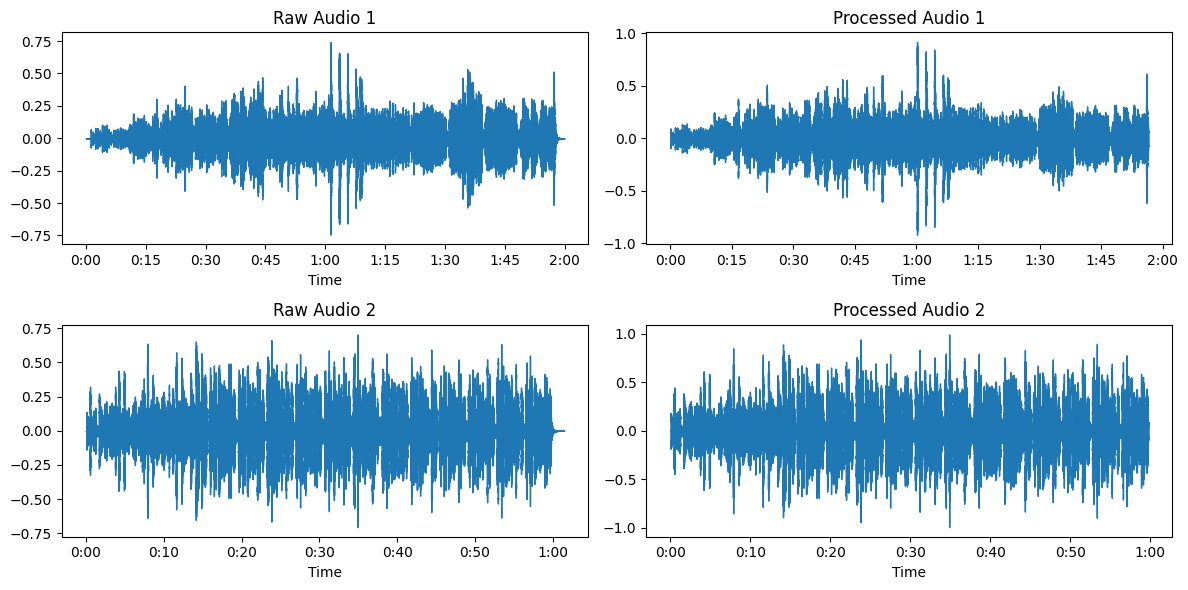

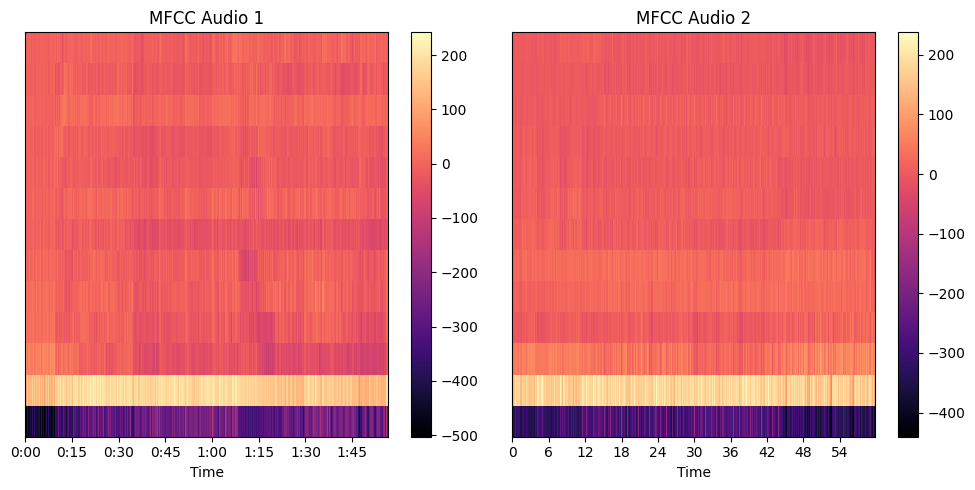

Features Tensor Shape: (2, 13, 1870)
Value Range: -502.6948915920746 241.74479859108826


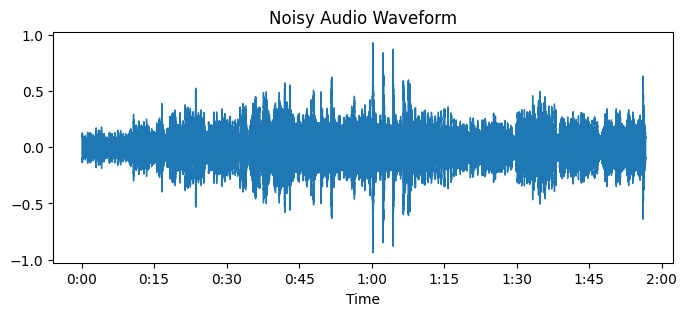

In [2]:
# =====================
# SPEECH PREPROCESSING
# =====================

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Load Two Audio Samples
# -------------------------------
# librosa.example() downloads internally (no urllib used)
audio_path1 = librosa.ex('nutcracker')
audio_path2 = librosa.ex('vibeace')

y1, sr1 = librosa.load(audio_path1, sr=None)
y2, sr2 = librosa.load(audio_path2, sr=None)

raw_audios = [(y1, sr1), (y2, sr2)]

# -------------------------------
# Preprocessing Functions
# -------------------------------
def normalize(audio):
    return audio / np.max(np.abs(audio))

# Simple smoothing filter (moving average)
def smoothing_filter(audio, kernel_size=5):
    kernel = np.ones(kernel_size) / kernel_size
    return np.convolve(audio, kernel, mode='same')

# -------------------------------
# Preprocessing Pipeline
# -------------------------------
processed_audios = []
target_sr = 16000

for audio, sr in raw_audios:
    # Resample to 16 kHz
    audio = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)

    # Normalize
    audio = normalize(audio)

    # Silence trimming
    audio, _ = librosa.effects.trim(audio, top_db=20)

    # Smoothing filter
    audio = smoothing_filter(audio)

    processed_audios.append(audio)

# -------------------------------
# Visualization: Raw vs Processed
# -------------------------------
plt.figure(figsize=(12,6))

for i in range(2):
    plt.subplot(2,2,i*2+1)
    librosa.display.waveshow(raw_audios[i][0], sr=raw_audios[i][1])
    plt.title(f"Raw Audio {i+1}")

    plt.subplot(2,2,i*2+2)
    librosa.display.waveshow(processed_audios[i], sr=target_sr)
    plt.title(f"Processed Audio {i+1}")

plt.tight_layout()
plt.show()

# -------------------------------
# Feature Extraction (MFCC)
# -------------------------------
mfccs = []

plt.figure(figsize=(10,5))

for i, audio in enumerate(processed_audios):
    mfcc = librosa.feature.mfcc(
        y=audio,
        sr=target_sr,
        n_mfcc=13
    )
    mfccs.append(mfcc)

    plt.subplot(1,2,i+1)
    librosa.display.specshow(
        mfcc,
        x_axis='time',
        sr=target_sr,
        cmap='magma'
    )
    plt.colorbar()
    plt.title(f"MFCC Audio {i+1}")

plt.tight_layout()
plt.show()

# -------------------------------
# Combine Features into One Tensor
# -------------------------------
min_len = min(m.shape[1] for m in mfccs)
mfccs = [m[:, :min_len] for m in mfccs]

features_tensor = np.stack(mfccs)

print("Features Tensor Shape:", features_tensor.shape)
print("Value Range:", features_tensor.min(), features_tensor.max())

# -------------------------------
# BONUS: Noise Experiment
# -------------------------------
noise = 0.02 * np.random.randn(len(processed_audios[0]))
noisy_audio = processed_audios[0] + noise

plt.figure(figsize=(8,3))
librosa.display.waveshow(noisy_audio, sr=target_sr)
plt.title("Noisy Audio Waveform")
plt.show()